

| EDA dataframe      | Description |due|
| ----------- | ----------- |----------- |
| grape_df  | 캠벨얼리 가격/거래량 + 소비자 물가 지수 + 자동차용경유 + 날씨(4개-평균기온, 평균온량, 일강수량, 일교차) + 수출입(4개) + 재배면적 + 샤인머스켓 거래량 + 실업률_경제활동인구(2개-경제활동인구, 실업률) + 최저시급    |20190101 ~ 20201104|
| shinemuscat_df   |샤인마스캇  가격/거래량 + 소비자 물가 지수 + 자동차용경유 + 날씨(4개-평균기온, 평균온량, 일강수량, 일교차) + 수출입(4개) + 재배면적 + 블루베리 거래량 + 실업률_경제활동인구(2개-경제활동인구, 실업률) + 최저시급        |20190101 ~ 20201104|
| df      | grape_train + shinemuscat_train       | 20190101 ~ 2020928|


**train accuracy / test accuracy 의 차이 비교 overfitting = 20% 이상 (10~20%)**

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl
from IPython.core.display import display, HTML
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import urllib.request
import requests
import json
import datetime
import os
from datetime import datetime
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

/var/folders/08/yfq1rzmx605_pllcn65f77540000gn/T/ipykernel_7623/2031877544.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
raw_path = '/Users/goeun/Documents/YearDream/ProJect/kurly_project/products_price_predict/data/raw/'
processed_path = '/Users/goeun/Documents/YearDream/ProJect/kurly_project/products_price_predict/data/processed/'

In [3]:
# tomato = pd.read_csv(processed_path+'tomato.csv')
grape = pd.read_csv(processed_path+'grape.csv')
shinemuscat = pd.read_csv(processed_path+'shinemuscat.csv')

train = pd.read_csv(raw_path+'train.csv')
test = pd.read_csv(raw_path+'test.csv')
private = pd.read_csv(raw_path+'private_data.csv')
submission = pd.read_csv(raw_path+'sample_submission.csv')


print(train.shape)
print(test.shape)
print(private.shape)
print(submission.shape)

(1733, 44)
(37, 44)
(291, 44)
(228, 22)


In [4]:
df = pd.concat([train,test]).reset_index(drop=True)
grape_df = df[['date','캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)' ]]
shinemuscat_df = df[['date', '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)']]

# LSTM
## 캠벨얼리


In [32]:
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from statsmodels.tsa.seasonal import seasonal_decompose, STL

train_split = 1705
valid_split = 1733

feature = ['캠벨얼리_거래량(kg)']
target = grape_df[['캠벨얼리_가격(원/kg)']]

X_train = df[feature][:train_split].values.reshape(-1,1,len(feature))
y_train = target[:train_split].values.reshape(-1,1,1)

X_valid = df[feature][train_split:valid_split].values.reshape(-1,1,len(feature))
y_valid = target[train_split:valid_split].values.reshape(-1,1,1)

X_test = df[feature][valid_split:].values.reshape(-1,1,len(feature))
y_test = target[valid_split:].values.reshape(-1,1,1)

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape,X_test.shape, y_test.shape)

(1705, 1, 1) (1705, 1, 1) (28, 1, 1) (28, 1, 1) (37, 1, 1) (37, 1, 1)


In [33]:
model = Sequential()
model.add(layers.Activation('relu'))
model.add(tf.compat.v1.keras.layers.LSTM(100, input_shape=(21,len(feature)), return_sequences=True))
model.add(Dropout(0.1))
model.add(layers.Dense(30))
model.add(Dropout(0.1))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(patience=30)
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split = 0.1, callbacks=[early_stopping], verbose=1)

Epoch 1/1000
48/48 [==============================] - 1s 4ms/step - loss: 14071373.0000 - val_loss: 22855706.0000
Epoch 2/1000
48/48 [==============================] - 0s 2ms/step - loss: 13981902.0000 - val_loss: 22694654.0000
Epoch 3/1000
48/48 [==============================] - 0s 2ms/step - loss: 13821234.0000 - val_loss: 22417182.0000
Epoch 4/1000
48/48 [==============================] - 0s 2ms/step - loss: 13554103.0000 - val_loss: 21920292.0000
Epoch 5/1000
48/48 [==============================] - 0s 2ms/step - loss: 13020472.0000 - val_loss: 20962340.0000
Epoch 6/1000
48/48 [==============================] - 0s 2ms/step - loss: 12202853.0000 - val_loss: 19571670.0000
Epoch 7/1000
48/48 [==============================] - 0s 2ms/step - loss: 11150154.0000 - val_loss: 17996880.0000
Epoch 8/1000
48/48 [==============================] - 0s 2ms/step - loss: 10010202.0000 - val_loss: 16363939.0000
Epoch 9/1000
48/48 [==============================] - 0s 2ms/step - loss: 8882694.0000 -

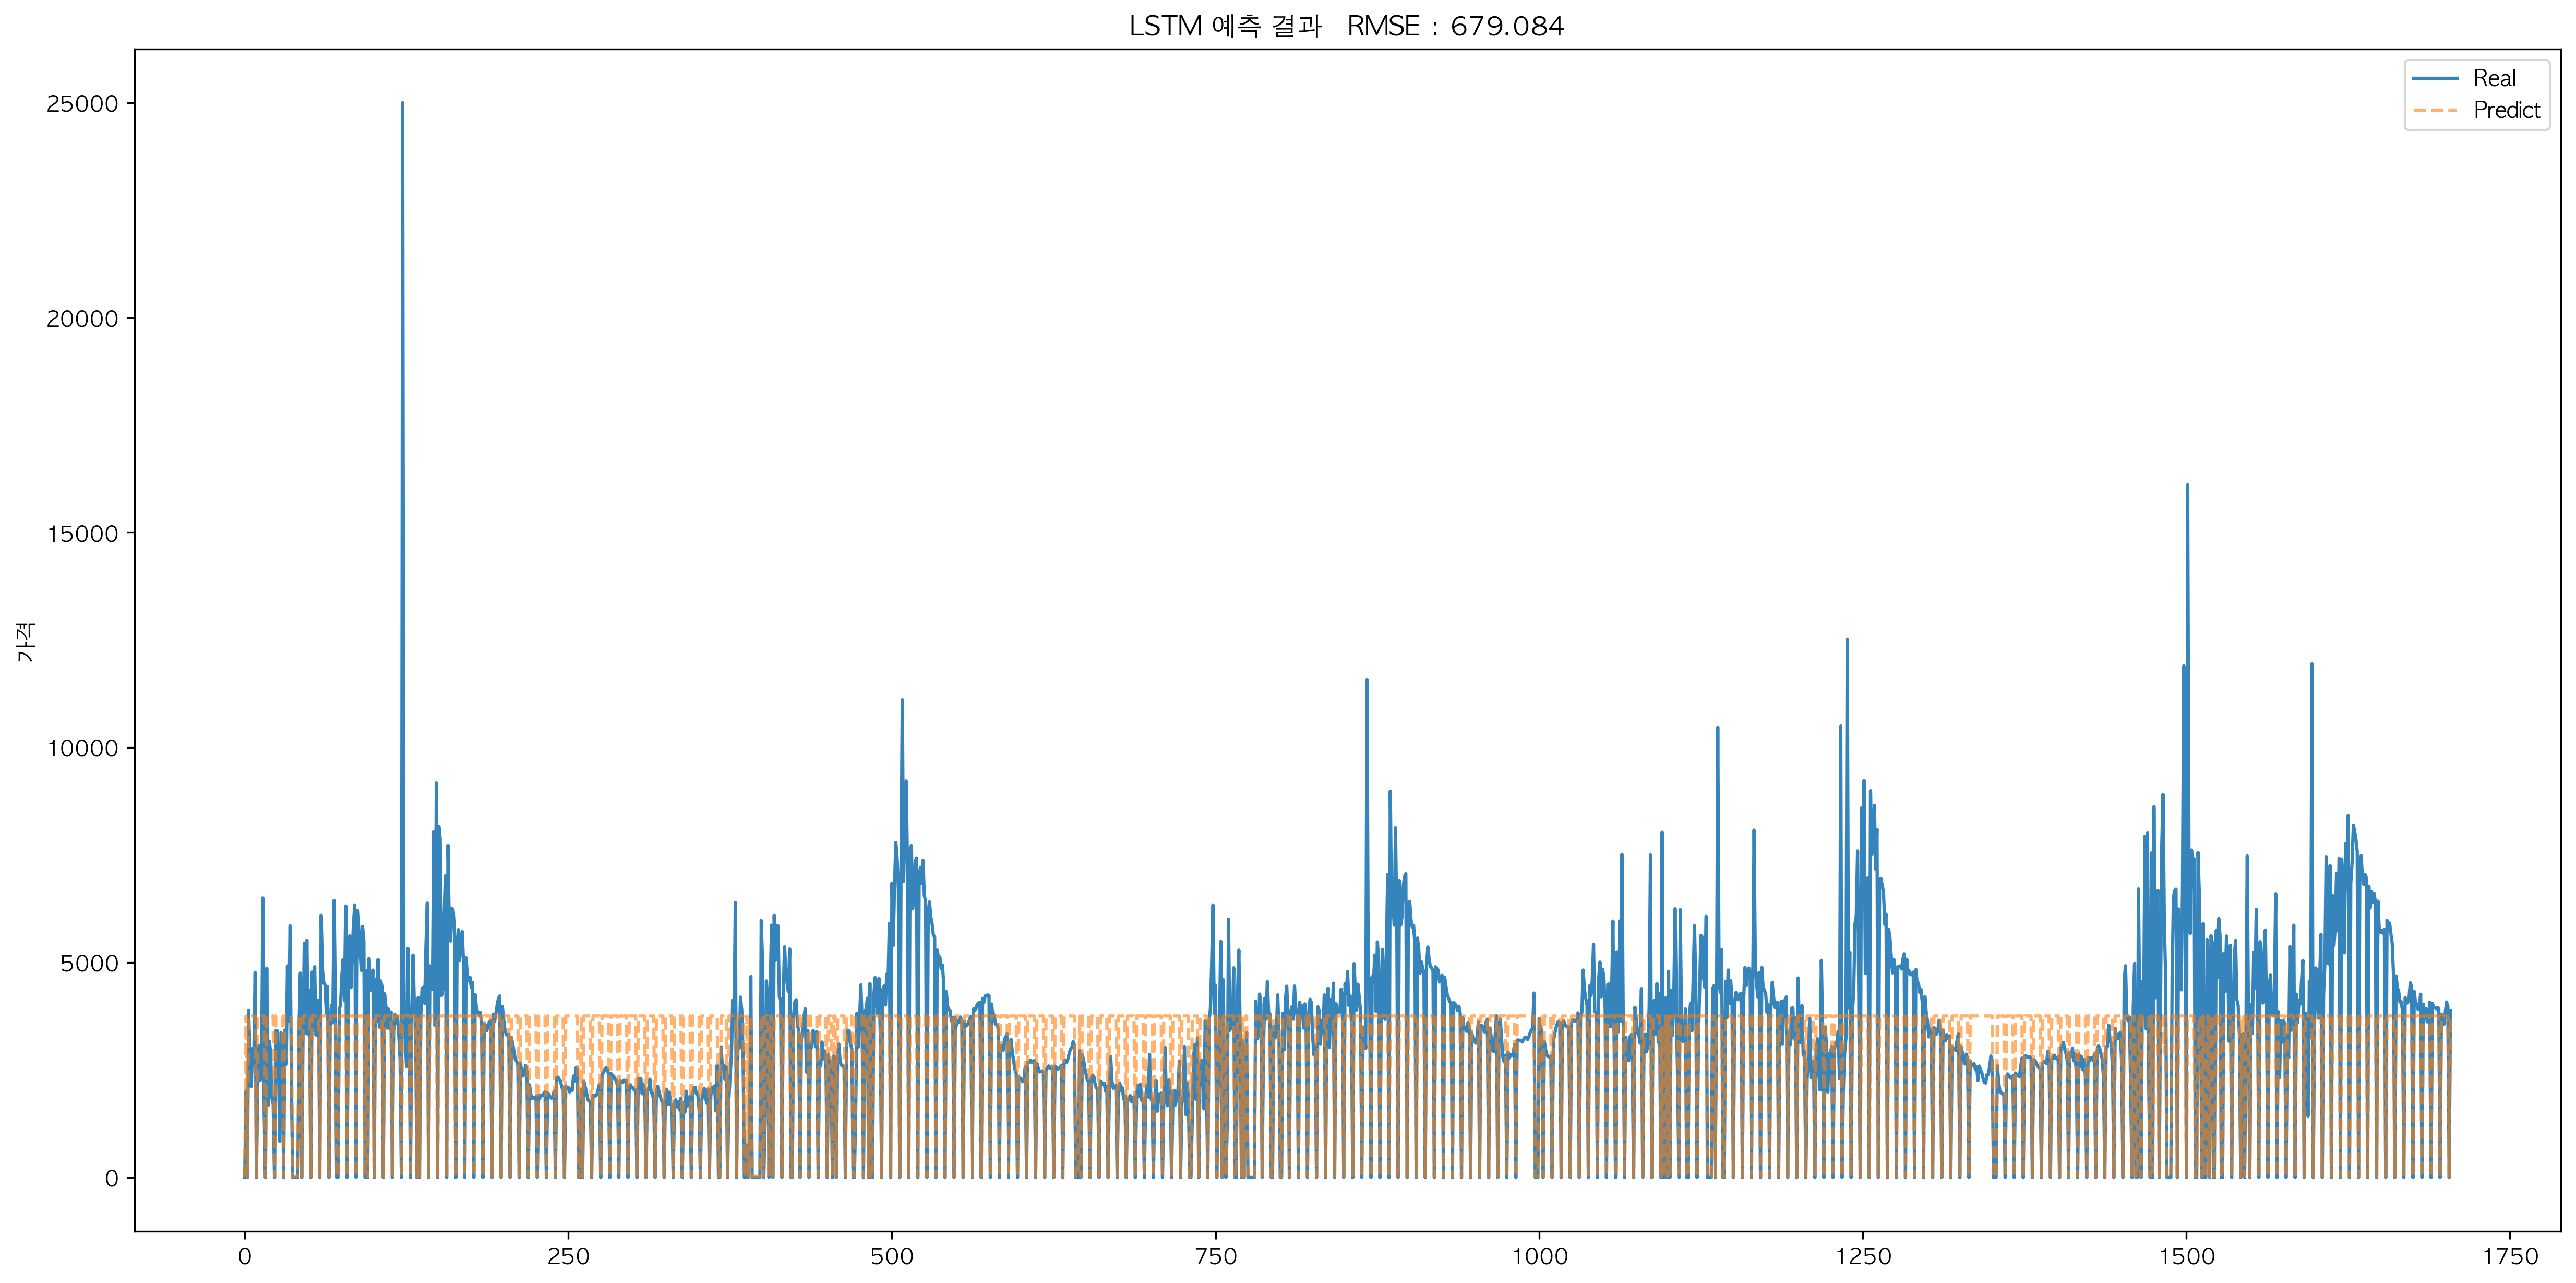

In [34]:
y_pred = model.predict(X_test)
RMSE = mean_squared_error(y_test.reshape(-1,1), y_pred.reshape(-1,1)) ** 0.5

plt.figure(figsize=(20, 10), dpi=300)
plt.title('LSTM 예측 결과'+   '   RMSE : ' + str(RMSE)[:7])
plt.ylabel('가격')
plt.plot(np.array(y_train.reshape(-1,1)), alpha = 0.9, label = 'Real')
plt.plot(model.predict(X_train).reshape(-1,1), alpha = 0.6, linestyle = "--", label = 'Predict')
plt.legend()
plt.show()


## 샤인머스켓

In [29]:
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from statsmodels.tsa.seasonal import seasonal_decompose, STL

train_split = 1705
valid_split = 1733

feature = ['샤인마스캇_거래량(kg)']
target = shinemuscat_df[['샤인마스캇_가격(원/kg)']]

X_train = df[feature][:train_split].values.reshape(-1,1,len(feature))
y_train = target[:train_split].values.reshape(-1,1,1)

X_valid = df[feature][train_split:valid_split].values.reshape(-1,1,len(feature))
y_valid = target[train_split:valid_split].values.reshape(-1,1,1)

X_test = df[feature][valid_split:].values.reshape(-1,1,len(feature))
y_test = target[valid_split:].values.reshape(-1,1,1)

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape,X_test.shape, y_test.shape)

(1705, 1, 1) (1705, 1, 1) (28, 1, 1) (28, 1, 1) (37, 1, 1) (37, 1, 1)


In [30]:
model = Sequential()
model.add(layers.Activation('relu'))
model.add(tf.compat.v1.keras.layers.LSTM(100, input_shape=(21,len(feature)), return_sequences=True))
model.add(Dropout(0.1))
model.add(layers.Dense(30))
model.add(Dropout(0.1))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(patience=30)
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split = 0.1, callbacks=[early_stopping], verbose=1)

Epoch 1/1000
48/48 [==============================] - 1s 7ms/step - loss: 95572104.0000 - val_loss: 253043328.0000
Epoch 2/1000
48/48 [==============================] - 0s 2ms/step - loss: 95437352.0000 - val_loss: 252694320.0000
Epoch 3/1000
48/48 [==============================] - 0s 2ms/step - loss: 95099048.0000 - val_loss: 251832784.0000
Epoch 4/1000
48/48 [==============================] - 0s 2ms/step - loss: 94312768.0000 - val_loss: 249981712.0000
Epoch 5/1000
48/48 [==============================] - 0s 2ms/step - loss: 92859912.0000 - val_loss: 247115824.0000
Epoch 6/1000
48/48 [==============================] - 0s 2ms/step - loss: 90975192.0000 - val_loss: 243650816.0000
Epoch 7/1000
48/48 [==============================] - 0s 2ms/step - loss: 88608744.0000 - val_loss: 239376224.0000
Epoch 8/1000
48/48 [==============================] - 0s 2ms/step - loss: 86015224.0000 - val_loss: 234634352.0000
Epoch 9/1000
48/48 [==============================] - 0s 2ms/step - loss: 830548

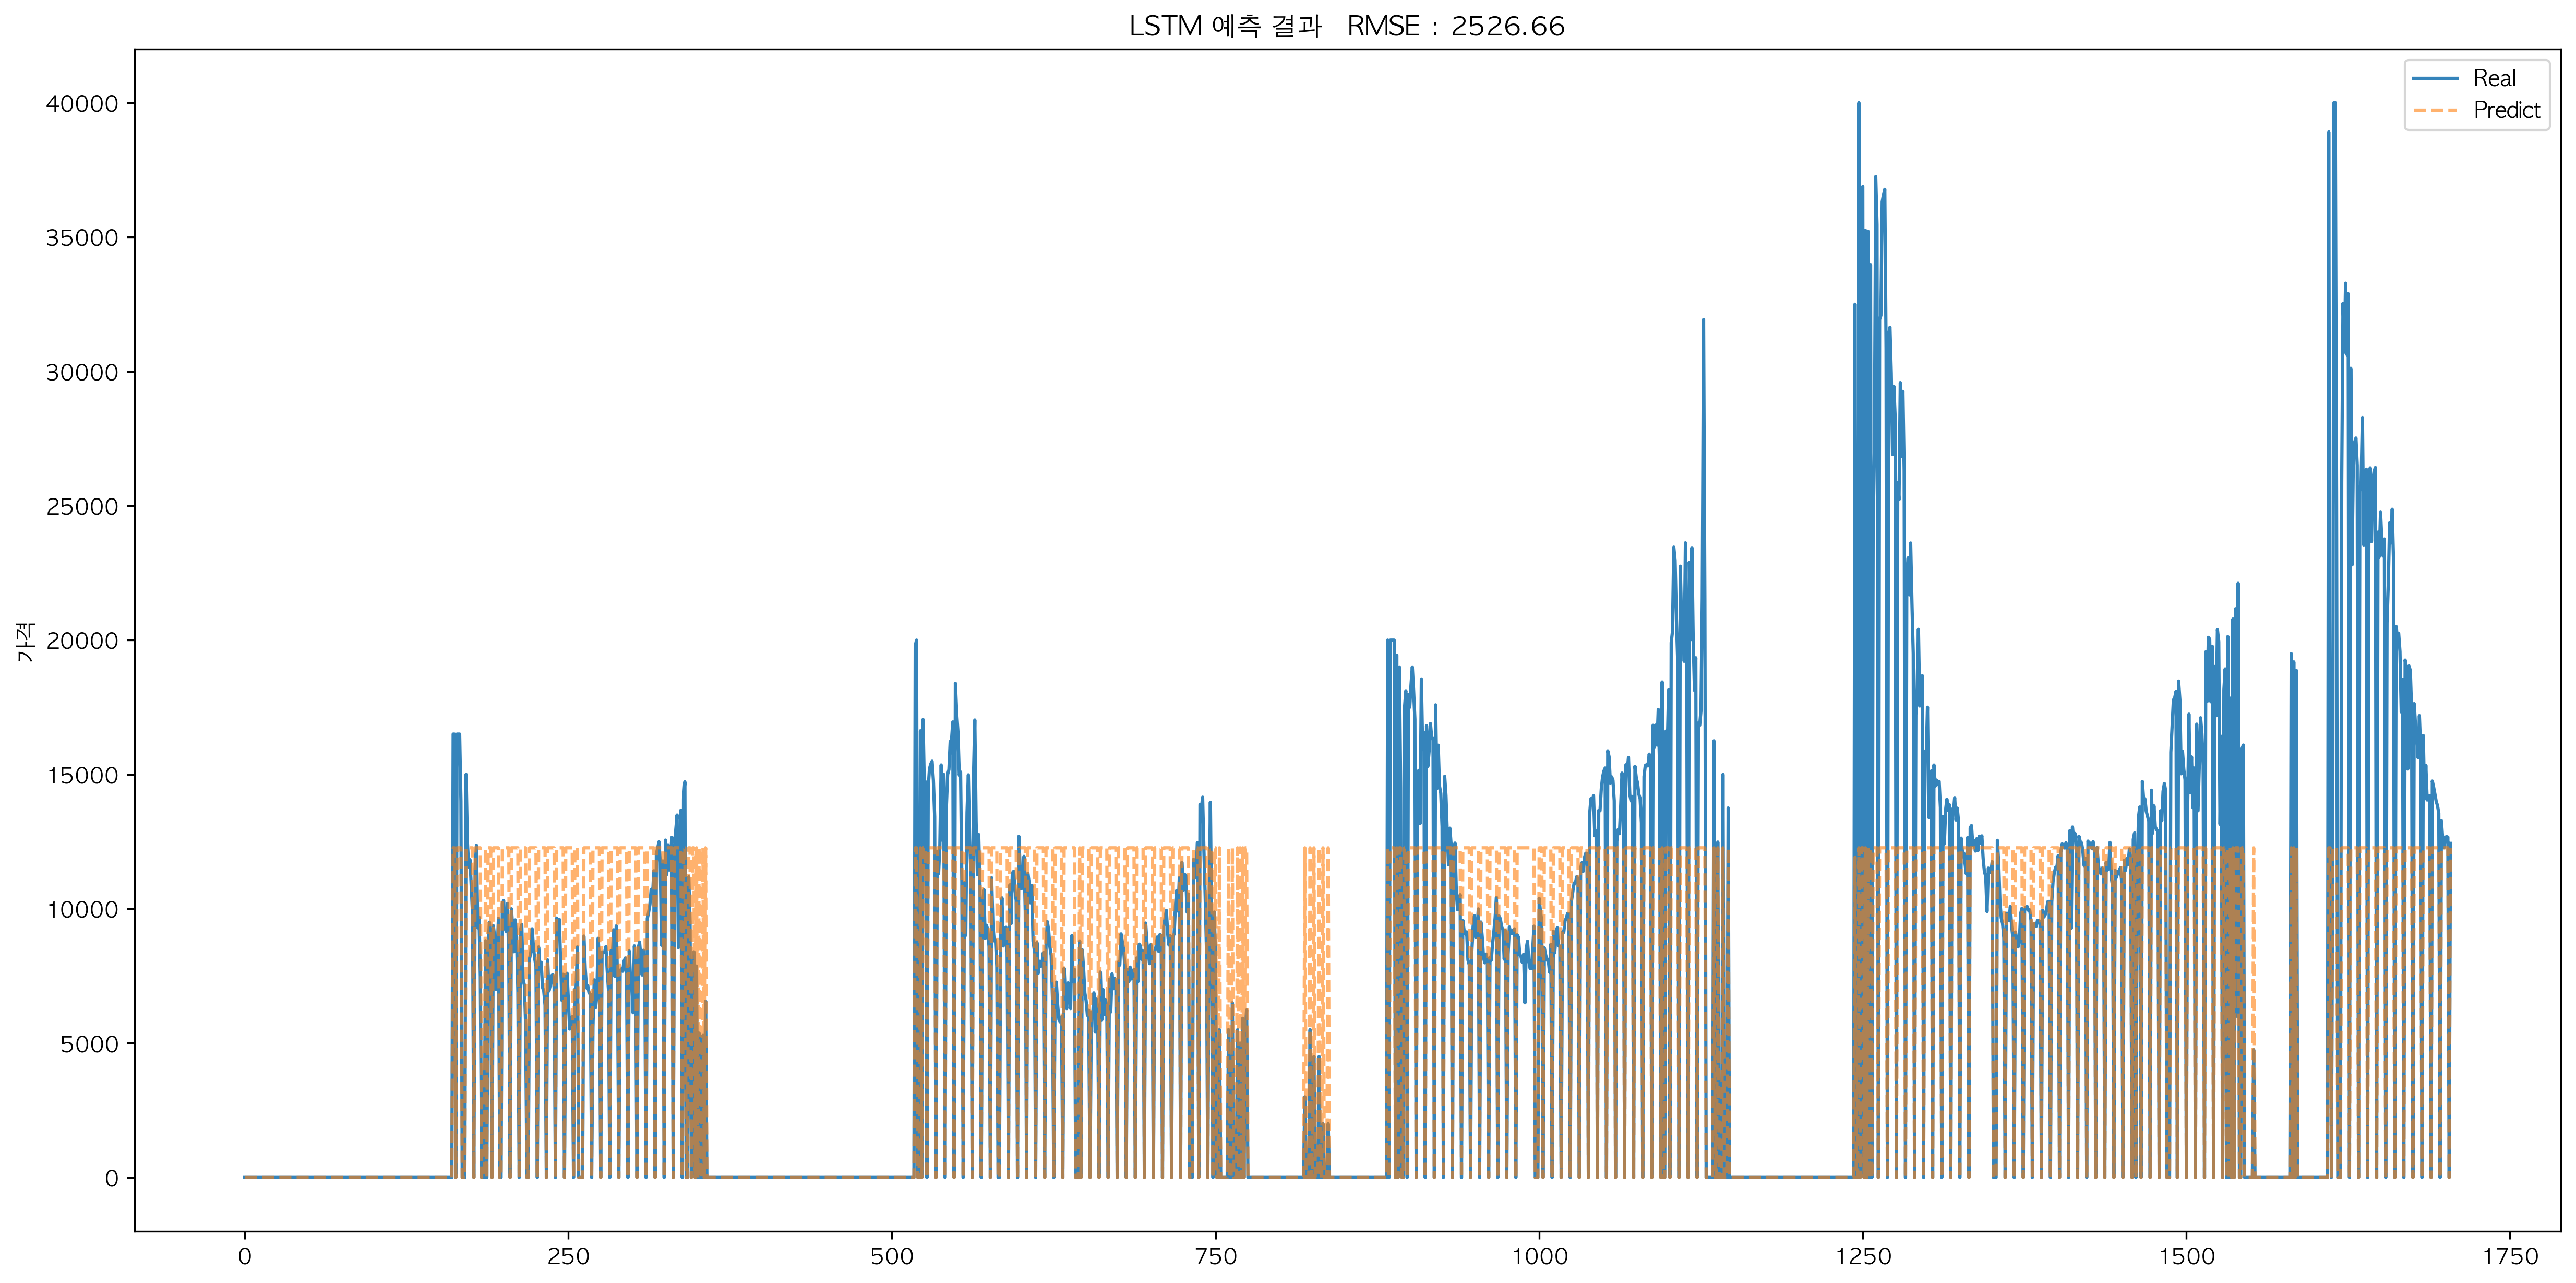

In [31]:
y_pred = model.predict(X_test)
RMSE = mean_squared_error(y_test.reshape(-1,1), y_pred.reshape(-1,1)) ** 0.5

plt.figure(figsize=(20, 10), dpi=300)
plt.title('LSTM 예측 결과'+   '   RMSE : ' + str(RMSE)[:7])
plt.ylabel('가격')
plt.plot(np.array(y_train.reshape(-1,1)), alpha = 0.9, label = 'Real')
plt.plot(model.predict(X_train).reshape(-1,1), alpha = 0.6, linestyle = "--", label = 'Predict')
plt.legend()
plt.show()